## MLFlow Model Serving with FastAPI

In [1]:
!mlflow --version

mlflow, version 1.30.0


### Create functions for all the steps involved in complete model training lifecycle
Note: Model creation is not the main purpose of this notebook so not everything related to data cleaning and preprocissing is present. Main idea is to understand how to track experiment using MLFlow.

In [14]:
import os

In [2]:
def load_data(url):
    import pandas as pd
    # Load dataset
    data = pd.read_csv(filepath_or_buffer=url,sep=',')
    return data

In [3]:
def train_test_pre_processing(final_data,target_column):
    X = final_data.loc[:, final_data.columns != target_column]
    y = final_data.loc[:, final_data.columns == target_column]
    
    return X, y

In [4]:
def training_basic_classifier(X_train,y_train):
    from sklearn.linear_model import LogisticRegression
    classifier = LogisticRegression()
    classifier.fit(X_train,y_train)
    
    return classifier

In [5]:
def predict_on_test_data(model,X_test):
    y_pred = model.predict(X_test)
    return y_pred

In [6]:
def predict_prob_on_test_data(model,X_test):
    y_pred = model.predict_proba(X_test)
    return y_pred

In [7]:
def get_metrics(y_true, y_pred, y_pred_prob):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,log_loss
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred,average='micro')
    recall = recall_score(y_true, y_pred,average='micro')
    #entropy = log_loss(y_true, y_pred_prob)
    return {'accuracy': round(acc, 2), 'precision': round(prec, 2), 'recall': round(recall, 2)}

In [24]:
def create_roc_auc_plot(clf, X_data, y_data):
    import matplotlib.pyplot as plt
    from sklearn import metrics
    metrics.plot_roc_curve(clf, X_data, y_data) 
    plt.savefig(os.getcwd() + '\classificationPlots\roc_auc_curve.png')

In [25]:
def create_confusion_matrix_plot(clf, X_test, y_test):
    import matplotlib.pyplot as plt
    from sklearn.metrics import plot_confusion_matrix
    plot_confusion_matrix(clf, X_test, y_test)
    plt.savefig(os.getcwd() + '\classificationPlots\confusion_matrix.png')

### Start calling above functions one by one and see the output

**Data Loading**

In [15]:
os.getcwd()

'C:\\Users\\bishw\\OneDrive\\Desktop\\Source_codes\\Regression-MLFlow-Flask-Application'

In [18]:
import pandas
data = pandas.read_csv(os.getcwd() + '\dataset\iris-train.csv')
data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Train-Test Split**

In [19]:
target_column = 'class'
X_train, y_train = train_test_pre_processing(data, target_column)

In [20]:
X_train.head(), y_train.head()

(   sepal-length  sepal-width  petal-length  petal-width
 0           5.1          3.5           1.4          0.2
 1           4.9          3.0           1.4          0.2
 2           4.7          3.2           1.3          0.2
 3           4.6          3.1           1.5          0.2
 4           5.0          3.6           1.4          0.2,
          class
 0  Iris-setosa
 1  Iris-setosa
 2  Iris-setosa
 3  Iris-setosa
 4  Iris-setosa)

In [21]:
test_data = pandas.read_csv(os.getcwd() + '\dataset\iris-train.csv')
target_column = 'class'
X_test, y_test = train_test_pre_processing(test_data, target_column)

In [22]:
X_test.head(), y_test.head()

(   sepal-length  sepal-width  petal-length  petal-width
 0           5.1          3.5           1.4          0.2
 1           4.9          3.0           1.4          0.2
 2           4.7          3.2           1.3          0.2
 3           4.6          3.1           1.5          0.2
 4           5.0          3.6           1.4          0.2,
          class
 0  Iris-setosa
 1  Iris-setosa
 2  Iris-setosa
 3  Iris-setosa
 4  Iris-setosa)

**Model Training** (Basic classifier, as here idea is not to create the best model however focus is on MLFlow model serving)

In [23]:
model = training_basic_classifier(X_train,y_train)

C:\Users\bishw\anaconda3\envs\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**See the prediction outcome**

In [26]:
y_pred = predict_on_test_data(model,X_test)
print(y_pred)
y_pred_prob = predict_prob_on_test_data(model,X_test)
print(y_pred_prob)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

**print some metrics**

In [27]:
run_metrics = get_metrics(y_test, y_pred, y_pred_prob)

In [28]:
run_metrics

{'accuracy': 0.96, 'precision': 0.96, 'recall': 0.96}

**Generate Confusion Matrix**

C:\Users\bishw\anaconda3\envs\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


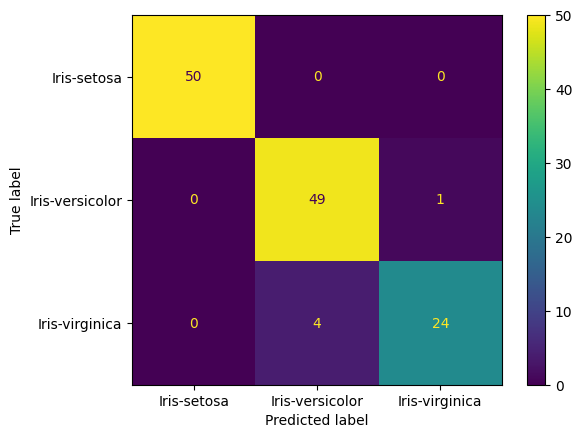

In [29]:
create_confusion_matrix_plot(model, X_test, y_test)

### Define create_experiment function to track your model experiment within MLFlow

In [33]:
def create_experiment(experiment_name,run_name, run_metrics,model, confusion_matrix_path = None, 
                      roc_auc_plot_path = None, run_params=None):
    import mlflow
    mlflow.set_tracking_uri("http://localhost:8000") 
    #use above line if you want to use any database like sqlite as backend storage for model else comment this line
    mlflow.set_experiment(experiment_name)
    
    with mlflow.start_run(run_name=run_name):
        
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])
            
        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric])
        
        
        
        if not confusion_matrix_path == None:
            mlflow.log_artifact(confusion_matrix_path, 'confusion_materix')
            
        if not roc_auc_plot_path == None:
            mlflow.log_artifact(roc_auc_plot_path, "roc_auc_plot")
        
        mlflow.set_tag("tag1", "Iris Classifier")
        mlflow.set_tags({"tag2":"Logistic Regression", "tag3":"Multiclassification using Ovr - One vs rest class"})
        mlflow.sklearn.log_model(model, "model")
    print('Run - %s is logged to Experiment - %s' %(run_name, experiment_name))

### Start Mlflow server

**Prefer to run it from command line**

`mlflow ui --backend-store-uri file:///C:...exact-file-path...` This will launch mlflow UI in the browser and you can access it using `localhost:5000` but this uses file as backend to store experiments and model artifacts. It does not support model registry functionality. 

To use model registry, you need to have some backend database other than the file system. Ex mysql, sqlite or any other DB mentioned in mlflow docs under backend storage. Refer: https://www.mlflow.org/docs/latest/tracking.html?highlight=scenario#how-runs-and-artifacts-are-recorded

#### In this case, we will use sqlite as backend, so run this command to start mlflow with backend.
`mlflow server --backend-store-uri sqlite:///C:...exact-path.../mlflow.db --default-artifact-root file:///C:...exact-path.../artifacts`

**Execute the create_experiment function and log experiment**

In [38]:
from datetime import datetime
experiment_name = "iris_classifier_"+ str(datetime.now().strftime("%d-%m-%y")) ##basic classifier
run_name="iris_classifier_"+str(datetime.now().strftime("%d-%m-%y"))
create_experiment(experiment_name,run_name,run_metrics,model, os.getcwd()+'\classificationPlots\confusion_matrix.png')

Run - iris_classifier_21-02-23 is logged to Experiment - iris_classifier_21-02-23


#### Now use the logged model and make some predictions using the below code

In [40]:
import mlflow
logged_model = 'runs:/2fcc8c495eb54685a15836d1b7bfa3fd/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
loaded_model.predict(pd.DataFrame(X_test))

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

**Open http://localhost:8000 in the browser, here you will find the recorded experiment**

### Adding an MLflow Model to the Model Registry
Reference: https://www.mlflow.org/docs/latest/model-registry.html


In [43]:
def create_exp_and_register_model(experiment_name,run_name,run_metrics,model,confusion_matrix_path = None, 
                      roc_auc_plot_path = None, run_params=None):
    mlflow.set_tracking_uri("http://localhost:8000") 
    #use above line if you want to use any database like sqlite as backend storage for model else comment this line
    mlflow.set_experiment(experiment_name)
    with mlflow.start_run(run_name=run_name) as run:
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])
            
        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric])
        
        if not confusion_matrix_path == None:
            mlflow.log_artifact(confusion_matrix_path, os.getcwd()+'\classificationPlots\confusion_materix')
            
        if not roc_auc_plot_path == None:
            mlflow.log_artifact(roc_auc_plot_path, os.getcwd()+'\classificationPlots\roc_auc_plot')
        
        mlflow.set_tag("tag1", "Logistic Regression")
        mlflow.set_tags({"tag2":"Basic Model", "tag3":"Production"})
        #This is where we are directly registering the model
        mlflow.sklearn.log_model(model, "model",registered_model_name="iris-classifier")

In the above code snippet, if a registered model with the name doesn’t exist, the method registers a new model and creates Version 1. If a registered model with the name exists, the method creates a new model version.

In [45]:
experiment_name = "iris_classifier_21-02-23"
run_name="iris_classifier_21-02-23"
create_exp_and_register_model(experiment_name,run_name,run_metrics,model,os.getcwd()+'\classificationPlots\confusion_matrix.png')

Successfully registered model 'iris-classifier'.
2023/02/21 13:56:35 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: iris-classifier, version 1
Created version '1' of model 'iris-classifier'.


### Fetching an MLflow Model from the Model Registry

**Fetch a specific model version**

In [46]:
import mlflow.pyfunc

model_name = "iris-classifier"
model_version = 1

model = mlflow.pyfunc.load_model(
    model_uri=f"models:/{model_name}/{model_version}"
)

y_pred = model.predict(X_test)
print(y_pred)

sklearn_model = mlflow.sklearn.load_model(
    model_uri=f"models:/{model_name}/{model_version}"
)
y_pred_prob = sklearn_model.predict_proba(X_test)
print(y_pred_prob)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

**Fetch the latest model version in a specific stage**

To fetch a model version by stage, simply provide the model stage as part of the model URI, and it will fetch the most recent version of the model in that stage.

#### Transitioning an MLflow Model’s Stage to Production

In [47]:
client = mlflow.tracking.MlflowClient()
client.transition_model_version_stage(
    name="iris-classifier",
    version=1,
    stage="Production"
)

<ModelVersion: creation_timestamp=1677009395981, current_stage='Production', description='', last_updated_timestamp=1677009455001, name='iris-classifier', run_id='e0f081f4b5164e1bbbbe6a74d9721a26', run_link='', source='file:///C:\\Users\\bishw\\OneDrive\\Desktop\\Source_codes\\Regression-MLFlow-Flask-Application\\artifacts/1/e0f081f4b5164e1bbbbe6a74d9721a26/artifacts/model', status='READY', status_message='', tags={}, user_id='', version='1'>

In [48]:
import mlflow.pyfunc

model_name = "iris-classifier"
stage = 'Production'

model = mlflow.pyfunc.load_model(
    model_uri=f"models:/{model_name}/{stage}"
)

y_pred = model.predict(X_test)
print(y_pred)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [49]:
import mlflow.pyfunc

model_name = "iris-classifier"
stage = 'Production'

model = mlflow.sklearn.load_model(
    model_uri=f"models:/{model_name}/{stage}"
)

y_pred = model.predict([[1.7,0.3,5.7,2.1]])
print(y_pred)
y_pred_prob = model.predict_proba([[1.7,0.3,5.7,2.1]])
print(y_pred_prob)

['Iris-virginica']
[[8.66113629e-07 1.23255696e-03 9.98766577e-01]]


C:\Users\bishw\anaconda3\envs\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\bishw\anaconda3\envs\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


### Serving an MLflow Model from Model Registry

In [50]:
mlflow.set_tracking_uri('http://localhost:8000')

**Run this from command line**

#### If running on windows, use this command : 
`set MLFLOW_TRACKING_URI=http://localhost:8000` 
#### If running on linux, use this command :
`export MLFLOW_TRACKING_URI=http://localhost:8000`

## **Now run this command on another anaconda prompt**

*Make sure to write the different port - other than the one you used while starting mlflow server*

`mlflow models serve --model-uri models:/iris-classifier/Production -p 1234 --no-conda`



### Once the server starts running, make a prediction by calling an endpoint

In [59]:
import requests

inference_request = {
        "data": [[1,3.3,0,2.1]]
}

endpoint = "http://localhost:1234/invocations"

response = requests.post(endpoint, json=inference_request)

print(response.text)

["Iris-setosa"]


### Using the same server end-point, make a batch prediction

In [54]:
X_test

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
123,6.3,2.7,4.9,1.8
124,6.7,3.3,5.7,2.1
125,7.2,3.2,6.0,1.8
126,6.2,2.8,4.8,1.8


In [60]:
import requests
lst = X_test.values.tolist()
inference_request = {
        "data": lst
}
endpoint = "http://localhost:1234/invocations"
response = requests.post(endpoint, json=inference_request)
print(response)

<Response [200]>


In [56]:
print(response.text)

["Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-versicolor", "Iris-versicolor", "Iris-versicolor", "Iris-versicolor", "Iris-versicolor", "Iris-versicolor", "Iris-versicolor", "Iris-versicolor", "Iris-versicolor", "Iris-versicolor", "Iris-versicolor", "Iris-versicolor", "Iris-versicolor", "I